Generative models은 새로운 데이터를 생성하는 것이다. 이전에 다루었던 모델과는 반대되는 모델이다. 이미지 분류 모델에서는 고차원의 입력을 받고, 이미지 내용과도 같은 저차원을 출력한다. 

2017년에 Deepfakes가 인터넷에 떠돌기 시작했다. GANs이 유명인들을 features하여 포르노 비디오를 생성하는데 사용되었다. 2016년에 연구자들은 정치인들이 연설하는 비디오를 입모양과 얼굴 표정까지 완벽하게 표현하는 비디오를 만들었다.

이 기술은 부정적인 부분만 있는 것은 아니다. sparse한 데이터를 생성하는데 있어 긍정적으로 쓰일 수 있다. 이 경우에 Generative models은 다른 모델이 학습할 수 있는 리얼한 데이터를 생성할 수 있다. Generative models은 이미지를 translate할 수 있다. 위성 사진을 스트릿 사진으로 변환할 수 있다. 또 다른 예로 website screenshot에서 code를 생성할 수도 있다. Generative model은 ML 모델의 unfairness와 discrimination을 다루는데도 사용할 수 있다.

금융 분야에서 data가 sparse한 경우가 있다. 데이터를 생성하여 유용한 features를 찾을 수 있다.

알고리즘 트레이딩에서 시뮬레이터에 의해서 데이터가 생성된다. 만약 만든 알고리즘이 global selloff에서 어떻게 하는지 알고 싶을 수 있을 것이다. 그러나 global selloff는 많이 생기진 않는다. 그렇기 때문에 퀀트들은 보통 global selloff 시뮬레이터를 만드는데 많은 시간을 쓴다. 이 시뮬레이터는 엔지니어의 경험과 그들의 느낌적 느낌에 의해 global selloff가 편향될 수 있다. 하지만, 만약 모델이 global selloff의 펀더멘탈을 배울 수 있다면 어떨까? 그리고 무한한 global selloff를 만들 수 있다면 어떨까?

이번에는 autoencoder와 GANs을 알아보겠다. autoencoder는 저차원으로 데이터를 압축하고 데이터를 충실하게 재구성한다. GANs은 discriminator가 가짜 이미지와 진짜 이미지를 구별할 수 없도록 generator를 훈련시킨다. 

### understanding autoencoders

기술적으로 autoencoders는 새로운 종류의 데이터를 생성할 수 없기 때문에 generative models은 아니다. 그러나 autoencoder를 조금 변형하면 가능하다. 

금융 분야에 초점을 둔다면, autoencoders는 신용카드사기 detecting과 같은 애플리케이션을 위한 흥미로운 속성을 가지고 있다. 

입력 x가 주어질 때 autoencoder는 출력 x를 학습니다. autoencoder는 함수 f를 찾는데 아래의 식이 참이 되도록 하는 것을 찾는다.

$$x = f(x)$$

별거없어 보일지 모르지만, 여기서 트릭은 autoencoder는 bottleneck을 가지고 있다는 것이다. middle hidden layer의 사이즈는 입력 x의 사이즈보다 작다. 그렇기에 모델은 작은 vector에 x의 중요한 모든 요소를 캡처하기 위해 compressed representation을 학습해야 한다. 

아래의 그림이 autoencoder의 compressed representation schema(개요)를 잘 보여준다.
![nn](https://miro.medium.com/max/528/1*Fm7RPNckepfCgLKtkKfskQ.png)
![nn](https://miro.medium.com/max/528/1*FGbATgGye0fTU9SMaCo16A.png)

이 compressed representation은 입력의 essence를 캡처하는 것이 목적이다. 예를 들어, genuine one한 것에서 부터 사기 거래를 구별하는 본질적인 것을 캡처하고 싶을 수 있다. Vanila autoencoders는 standard principal component analysis와 비슷한 느낌으로 수행한다. 데이터에서 차원을 줄이고 중요한 것에 집중한다. 그러나 PCA와는 다르게, autoencoder는 특정 type의 데이터를 더 생성하도록 확장할 수 있다. 예를 들어, autoencoder는 이미지나 비디오 데이터를 더 잘 다룰 수 있는데 convolutional layer를 사용하여 데이터의 spatiality를 이용할 수 있다. 

두개의 autoencoder 모델을 만들어 보겠다. 첫번째 모델은 MNIST 데이터를 사용한다. 두번째는 사기 탐지 작업을 위해 사용할 것이다. 

### Autoencoder for MNIST

나중에 쓸 하이퍼파라미터인 인코딩 차원을 설정한다.

In [16]:
encoding_dim = 32  

Keras의 functional API를 사용하여 autoencoder를 만든다. sequential API로도 만들 수 있지만, functional API와 친해져보자.

먼저, functional API 모델을 만들 수 있는 Model 클래스를 임포트하고, Input과 Dense 레이어를 임포트하자. 

In [17]:
from keras.models import Model
from keras.layers import Input, Dense

In [18]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [19]:
autoencoder = Model(input_img, decoded)

무엇이 만들었는지 보기 위해, autoencoder의 결과를 시각화할 수 있다.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True) 
plt.figure(figsize=(10, 10))

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


<Figure size 1000x1000 with 0 Axes>

In [21]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [23]:
import tensorflow as tf

# data_train, data_test = tf.keras.datasets.mnist.load_data()
# validation_size = 1000

# (images_train, labels_train) = data_train
# (images_test, labels_test) = data_test

# # images
# images_validation = images_train[-validation_size:]
# images_train      = images_train[:validation_size]

# # labels
# labels_validation = labels_train[-validation_size:]
# labels_train      = labels_train[:validation_size]

# X_train = images_train.astype('float32') / 255.
# X_test = images_validation.astype('float32') / 255.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import seed
seed(1)
tf.random.set_seed(2)


def mnist_load_data(path='mnist.npz'):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
    return (x_train, y_train), (x_test, y_test)
        

(X_train, y_train), (X_test, y_test) = mnist_load_data(path='../input/mnist.npz')

In [25]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

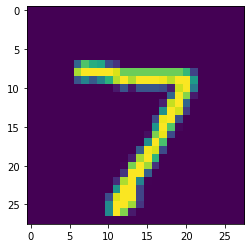

In [26]:
plt.imshow(X_test[0])

In [27]:
X_train_flat = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_flat = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train_flat.shape)
print(X_test_flat.shape)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

(60000, 784)
(10000, 784)


In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [15]:
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
X_train_flat = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_flat = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train_flat.shape)
print(X_test_flat.shape)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train_flat, X_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_flat, X_test_flat))

NameError: name 'X_train' is not defined

In [38]:
original = np.expand_dims(X_test_flat[0],0)
one = autoencoder.predict(original)

In [39]:
one = one.reshape(1,28,28)
original = original.reshape(1,28,28)

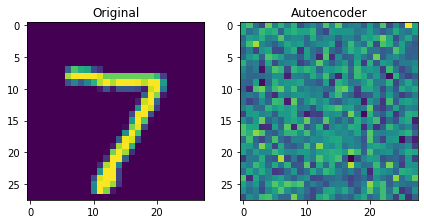

In [40]:
fig = plt.figure(figsize=(7, 10))
a=fig.add_subplot(1,2,1)
a.set_title('Original')
imgplot = plt.imshow(original[0,:,:])

b=fig.add_subplot(1,2,2)
b.set_title('Autoencoder')
imgplot = plt.imshow(one[0,:,:])

In [41]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics


In [42]:
batch_size = 100
original_dim = 784
latent_dim = 32
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0


In [43]:
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


In [44]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon


In [45]:
z = Lambda(sampling)([z_mean, z_log_var])


In [46]:
h_decoded = Dense(intermediate_dim, activation='relu')(z)

x_decoded = Dense(original_dim, activation='sigmoid')(h_decoded)


In [47]:
vae = Model(x, x_decoded)


In [48]:
reconstruction_loss = original_dim * metrics.binary_crossentropy(x, x_decoded)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)


In [49]:
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          200960      input_7[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 32)           8224        dense_11[0][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 32)           8224        dense_11[0][0]                   
____________________________________________________________________________________________

In [50]:
vae.fit(X_train_flat,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_flat, None))


Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 479.3681 - val_loss: 470.8866
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 469.6577 - val_loss: 468.6115
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 467.4948 - val_loss: 466.5313
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 465.9691 - val_loss: 465.5833
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 465.3232 - val_loss: 465.1158
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 464.9030 - val_loss: 464.6936
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 464.4435 - val_loss: 464.2078
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 464.0010 - val_loss: 463.8128
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 463.6402 - val_loss: 463.4716
Epoch 10/50
600/600 [==============================] - 1s 2ms/st

In [51]:
one_seven = X_test_flat[0]


In [52]:
one_seven = np.expand_dims(one_seven,0)


In [53]:
one_seven.shape


(1, 784)

In [54]:
one_seven = one_seven.repeat(4,axis=0)


In [55]:
s = vae.predict(one_seven)


In [56]:
s.shape


(4, 784)

In [57]:
s= s.reshape(4,28,28)


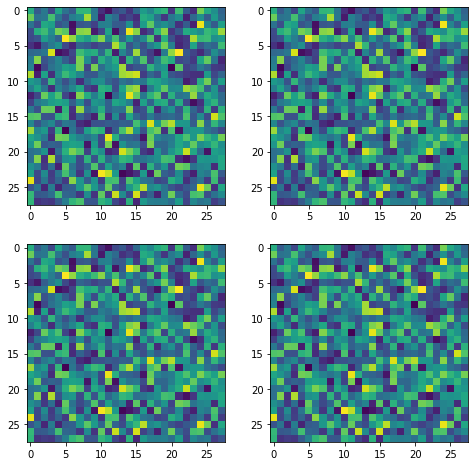

In [58]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = s[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [59]:
encoder = Model(x, z_mean)


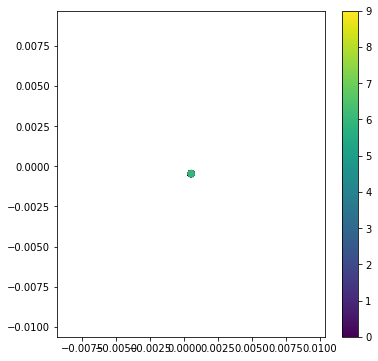

In [60]:
x_test_encoded = encoder.predict(X_test_flat, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()


### Autoencoder for credit cards

이번 섹션을 통해서 신용카드 사기 문제를 한 번 더 다뤄보자. 다루를 데이터셋에서 익명화된 신용카드 거래 기록이 있는데, feature engineering을 하기엔 적합하지 않아 end-to-end learning method로 fraud detoection을 해보자.

In [61]:
import numpy as np
import pandas as pd

df = pd.read_csv('../input/creditcard.csv')

In [62]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time 컬럼은 transaction에 대한 절대 시간인데, 여기서는 데이터를 다루기 힘들게 한다. 그래서 그냥 이 컬럼을 없앤다.

In [64]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
df = df.drop('Time',axis=1)

Class 컬럼을 제외하고 데이터의 값을 X에 넣고, Y에는 Class 컬럼에 해당하는 값을 넣는다.

In [66]:
X = df.drop('Class',axis=1).values 
y = df['Class'].values
print(X.shape)

(284807, 29)


In [67]:
X[0]

array([-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
       -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
        3.63786970e-01,  9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
       -9.91389847e-01, -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
        2.07971242e-01,  2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
       -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
        1.28539358e-01, -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
        1.49620000e+02])

이제 feature scale이 필요로 한다. 피처 스케일링은 모델이 좋은 데이터의 표현을 쉽게 학습할 수 있다. feature의 스케일을 0에서 1사이로 맞추겠다. 그러나 이 방법은 이상치에 민감하다는 것을 알아야 한다. 각 컬럼에 대해 최소값을 빼서 최소값이 0이 되도록 한다. 그 다음 최댓값으로 나눈다. 최댓값이 1이 되로록 최댓값으로 나눈다. 

In [68]:
X -= X.min(axis = 0)
X /= X.max(axis = 0)

In [69]:
X.mean()

0.5213456986251124

그런 다음 데이터를 나누자.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

이전에 만들었던 autoencoder와 같은 걸 만드는데 차원을 다르게 해보겠다. 입력은 29차원이고 12차원으로 압축하고 다시 29차원으로 복구한다. 여기서 12차원은 임의로 정한 것이다. 

In [71]:
from keras.models import Model
from keras.layers import Input, Dense

디코드 데이터를 위해 활성화 함수로 시그모이드 함수를 사용하겠다. 데이터의 스케일을 0과 1사이로 만들어야 하기 때문에 시그모이드만 가능하다. tanh 함수를 인코딩 레이어에 사용한다. 인코딩된 값이 -1과 1사이에 있어야 하고 실험적으로 잘 작동해서 쓴다. 개인의 필요에 따라 다른 활성화 함수를 사용할 수 있다.

만약 이미지 또는 깊은 신경망으로 작업한다면 ReLU activation이 좋은 선택이다. 그러나 shallower network를 지금과 같은 작업에 사용한다면 tanh는 잘 작동한다.

In [72]:
data_in = Input(shape=(29,))
encoded = Dense(12,activation='tanh')(data_in)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(data_in,decoded)

이 예제에서 우리는 mean squared error loss를 사용한다. 시그모이드 활성화 함수를 MSE와 같이 사용하는게 일반적이지 않아서 이상하게 보일 수 있다. 보통 시그모이드 함수는 cross-entropy loss와 같이 사용한다. 그러나  크로스 엔트로피는 0 또는 1 과 같은 값에 쓰이는데 분류 문제에 적합하다.

우리의 credit card 예제에서, 대부분의 값은 0.5이다. MSE는 타겟이 binary가 아니라 범위의 값을 잘 다룬다. 

In [73]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
X_train.shape

(256326, 29)

In [75]:
autoencoder.fit(X_train,
                X_train,
                epochs = 20, 
                batch_size=128, 
                validation_data=(X_test,X_test))

Epoch 1/20
2003/2003 [==============================] - 3s 2ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 2/20
2003/2003 [==============================] - 3s 2ms/step - loss: 0.0011 - val_loss: 8.9021e-04
Epoch 3/20
2003/2003 [==============================] - 3s 2ms/step - loss: 7.4000e-04 - val_loss: 5.8809e-04
Epoch 4/20
2003/2003 [==============================] - 3s 2ms/step - loss: 4.9608e-04 - val_loss: 4.3634e-04
Epoch 5/20
2003/2003 [==============================] - 3s 2ms/step - loss: 3.6702e-04 - val_loss: 3.1912e-04
Epoch 6/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.9590e-04 - val_loss: 2.8235e-04
Epoch 7/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.7278e-04 - val_loss: 2.6590e-04
Epoch 8/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.5951e-04 - val_loss: 2.5330e-04
Epoch 9/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.4674e-04 - val_loss: 2.4177e-04
Epoch 10/20
2003/2003 

In [76]:
X_test.mean()

0.521391150408518

loss 값이 작은데, autoencoder가 잘 작동했는지 어떻게 알 수 있을까? 육안으로 조사하면 될 것이다. 사람은 시각저인 것을 잘 판단하지만 추상적인 숫자를 잘 판단하진 않는다. 

육안으로 알기 위해, 테스트 데이터의 서브셋을 autoencoder를 통해 실행하여 예측을 해보자.

In [77]:
pred = autoencoder.predict(X_test[0:10])

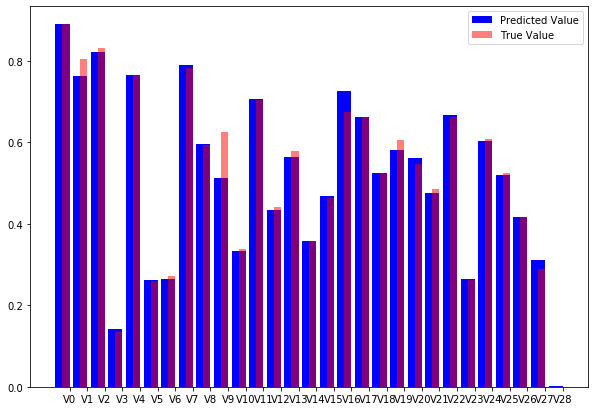

In [78]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8

prediction = pred[9]
true_value = X_test[9]

indices = np.arange(len(prediction))

fig = plt.figure(figsize=(10,7))

plt.bar(indices, prediction, width=width, 
        color='b', label='Predicted Value')

plt.bar([i+0.25*width for i in indices], true_value, 
        width=0.5*width, color='r', alpha=0.5, label='True Value')

plt.xticks(indices+width/2., 
           ['V{}'.format(i) for i in range(len(prediction))] )

plt.legend()

plt.show()

위에서 보듯이 오리지널 값을 잘 만들어냈다. 

### Visualizing latent spaces with t_SNE

autoencoder의 주요한 이점은 transaction을 저차원으로 표현하여 transaction의 주요한 요소를 캡처할 수 있다는 것이다.

In [79]:
encoder = Model(data_in, encoded)

In [80]:
enc = encoder.predict(X_test)

그러나 이 인코딩이 어떻게 fraud에 대한 의미있는 정보를 포함하고 있는지 알 수 있을까? 시각적으로 표현하는 것이 중요한데 인코딩 차원이 인풋 데이터보다 적긴 하지만 그래도 12차원이고 12차원 공간을 사람이 이해하기란 어렵다. 그래서 저차원으로 인코딩 모델의 특징을 보존하면서 표현할 필요가 있다.

이 경우 주요하게 생각해봐야 하는 개념은 proximity(이웃, 근접)이다. 12차원의 이웃을 2차원으로 표현해야 하는데 이웃을 잘 다뤄야 한다. 고차원에서의 이웃이 저차원에서도 이웃이 되어야 한다는 말이다.

이웃을 보존하는 것은 fraud의 군집을 찾기를 원하기 때문에 중요하다. 고차원을 저차원으로 바꿀때 이웃을 보존하면서 바꾸는 방법으로 t-distributed stochastic neighbor embedding(t-SNE)가 있다.

t-SNE는 무작위 표본의 모든 점에서 두 점이 이웃일 확률을 나타낸다. 고차원 데이터와 동일한 가까운 이웃일 확률을 갖는 데이터의 저차원을 찾는다.

In [81]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, n_iter=5000)
res = tsne.fit_transform(enc)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28481 samples in 0.079s...
[t-SNE] Computed neighbors for 28481 samples in 10.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28481
[t-SNE] Computed conditional probabilities for sample 2000 / 28481
[t-SNE] Computed conditional probabilities for sample 3000 / 28481
[t-SNE] Computed conditional probabilities for sample 4000 / 28481
[t-SNE] Computed conditional probabilities for sample 5000 / 28481
[t-SNE] Computed conditional probabilities for sample 6000 / 28481
[t-SNE] Computed conditional probabilities for sample 7000 / 28481
[t-SNE] Computed conditional probabilities for sample 8000 / 28481
[t-SNE] Computed conditional probabilities for sample 9000 / 28481
[t-SNE] Computed conditional probabilities for sample 10000 / 28481
[t-SNE] Computed conditional probabilities for sample 11000 / 28481
[t-SNE] Computed conditional probabilities for sample 12000 / 28481
[t-SNE] Computed conditional probabilities for sa

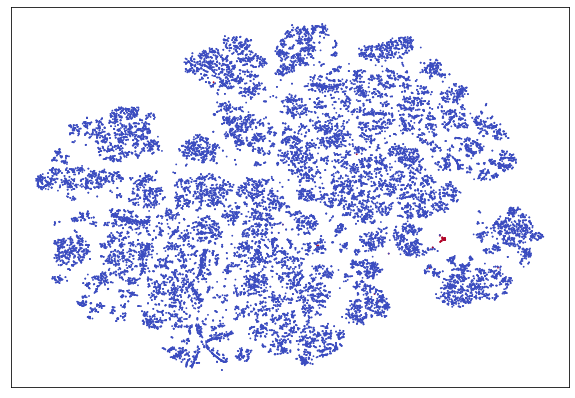

In [82]:
fig = plt.figure(figsize=(10,7))
scatter = plt.scatter(res[:,0], res[:,1], c=y_test, cmap='coolwarm', s=0.6)
scatter.axes.get_xaxis().set_visible(False)
scatter.axes.get_yaxis().set_visible(False)

### Variational autoencoders(VAE)

오토인코터는 PCA와 기본적으로 비슷하다. 그러나 generative 모델로 확장할 수 있다는 특징이 있다. fraud case에서 인코더는 transaction의 가장 중요한 특징을 나타낼 수 있는 가능한 인코딩을 만들어 낼 수 있고 디코더는 모든 인코딩을 오리지널 transaction으로 바꿀 수 있다.

transaction에 대한 데이터를 생성할 수 있도록 해주기 때문에 유용하다. fraud detection의 문제는 fraudulent transaction이 많지 않다는 것이다. VAE를 사용하면 트랜잭션 인코딩을 마음 껏 샘플링할 수 있고 더 많은 사기 거래 데이터를 학습 시킬 수 있다. 

그래서 VAE는 어떻게 작동할까? 하나의 compressed representation vector를 갖는 대신, 두 개를 갖는다. $u$는 mean encoding을 위한 것이고 하나는 이 인코딩의 standard deviation을 위한 $\sigma$이다. 

![VAE](https://datascienceschool.net/upfiles/f38b90fa89cb46eba22178edbae07a26.png)

mean과 standard deviation은 벡터이다. actual encoding vector를 만들기 위해서, standard deviation에 random noise를 더한다. 

valuesd의 broad distribution을 얻기 위해, network를 학습할 때 두개의 loss를 조합한다. reconstruction loss는 vanila autoencoder에서 봤던 것이고, KL divergence loss는 encoding distribution과 standard deviation이 1인 standard Gaussian distribution 사이입니다.

### MNIST example

MNIST dataset을 가지고 VAE에 대해서 알아볼텐데 VAE가 어떻게 작동하는지 도움을 줄 것이다. 그리고 다음에 VAE를 credit card 사기 탐지를 위해 적용하고자 한다.

우선, 필요한 몇가지 요소들을 임포트하자.

In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras import backend as K
from keras import metrics

lambda layer와 metrics 라는 새로운 모듈을 임포트 했다. metrics 모듈은 cross-entropy loss와 같은 것을 제공하는데, custom loss function을 만드는데 사용한다. 반면에 lambda layer는 Python function을 layer로 사용할 수 있도록 해주는데, encoding distribution에서 sample을 뽑는데 쓸 것이다. 좀 있다 lambda layer가 어떻게 작동하는지 알아 볼 것이다. 그러나 우선, neural network의 나머지 부분을 설정해야 한다.

우선 hyperparameter를 정의해야 한다. 오리지널 데이터의 차원은 784이고 이것은 32 dimension으로 압축할 것이다. network는 input과 latent vector 사이에 intermediate layer를 가지고 있는데 256차원이다. 50 epochs 만큼 학습할 것이고 배치 사이즈는 100이다.

In [2]:
batch_size = 100
original_dim = 784
latent_dim = 32
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

Computational reason 때문에, standard deviation보다 standard deviation의 로그값을 학습하는 것이 더 쉽다. 이를 위해 input x가 intermediate layer h에 매핑되는 network를 앞단에 만든다. 이 layer에서 $u$를 말하는 z_mean과 log $\sigma$를 나타내는 z_log_var로 나뉜다.

In [3]:
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

### Using the Lambda layer

Lambda layer는 arbitrary expression을 감싼다. 그 말은 Python function을 Keras layer로 여긴다는 것이다. 작동하게 만드려면 필요한 요구사항이 몇개 있다. backpropagation이 작동하기 위해서, function은 미분가능(differentiable)해야 한다. 결국 network weight를 gradient loss로 업데이트해야 하기 때문이다. 운이 좋게도 Keras backend 모듈에는 전부 미분가능한 몇가지 function을 가지고 있다. 

추가적으로 Lamdba function은 오직 하나의 인자를 가진다. 우리가 만들고자 하는 layer는 input은 그 전 layer의 output tensor이다. 이 경우 두개의 인자 $u$, $\sigma$를 받는 layer를 만들어야 한다. 그러므로 두 input을 tuple로 감싼다.

아래는 sampling을 위한 fucntion이다.

In [4]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

이 함수에 대해 좀 자세히 알아보자.

1. input tuple을 두개의 input tensor로 분리한다.
2. 평균이 0, 표준편차가 1인 정규분포를 따르는 랜덤 노이즈를 포함하는 tensor를 만든다.
3. 랜덤 노이즈에 표준편차를 곱하여 학습된 표준편차와 학습된 평균을 더한다. 학습을 로그 표준편차로 했기 때문에 exponent 함수를 학습된 tensor에 적용한다.

이 operation은 keras backend function을 쓰기 때문에 미분 가능하다. 함수를 하나의 레이어로 바꾸고 한 line으로 2개의 레이어를 연결할 수 있다.

In [5]:
z = Lambda(sampling)([z_mean, z_log_var])

이제 인코딩된 데이터를 가지고 있다. 그리고 이 데이터를 디코딩 할 필요도 있다. 두개의 Dense layers를 가지고 할 수 있다.

In [6]:
h_decoded = Dense(intermediate_dim, activation='relu')(z)

x_decoded = Dense(original_dim, activation='sigmoid')(h_decoded)

이제 네트워크가 완성되었다. 네트워크는 임의의 MNIST image를 평균 및 표준편차 텐서로 인코딩하며 이것은 이미지로 재구성할 수 있다. 이제 남은 건 네트워크가 이미지를 재구성하고 normal 가우시안 분포를 생성하도록 인센티브를 주는 사용자 지정 loss이다. 

### Kullback-Leibler divergence

VAE를 위한 custom loss를 만들기 위해, costum loss function을 만들어야 한다. 이 손실 함수는 Kullback-Leibler divergence에 기초한다.

KL divergence는 cross-entropy와 같은 metrics중 하나인데 정보이론에서 온 머신러닝 방법론이다. 자주 사용되지만 이걸 이해하려고 하면 쉽진 않다. 

financial model에 대해 작업하고 있고 증권 투자 수식에 대한 데이터를 수집했다고 가정해보자. 모든 financial modeling tools이 수익의 정규 분포를 가정합니다. 실제 수익에 대한 분포와 정규 분포 모델을 사용한 수익에 대한 모델을 비교해보자. 이 예제에서는 discrete 수익만 있다고 친다. 

물론 데이터의 수익률은 정확인 정규 분포를 따르지 않는다. 그렇다면 근사치를 잃어버리면 수익에 대한 정보가 얼마나 손실될까? 이것을 측정하는 것이 KL divergence가 하는 것이다.

$$D_{KL} (p||q) = \sum_{i=1}^{N} p(x_i)*(logp(x_i)-logq(x_i))$$

여기서 p(x)와 q(x)는 x에 대한 확률인데, 수익률 5%와 같이 어떤 값 i를 가질 확률을 말한다. 이 공식은 분포 p와 분포 q의 확률의 로그에 대한 차이를 효과적으로 보여준다. 

$$D_{KL} = E[logp(x) - logq(x)]$$

이 예상되는 로그 확률의 차이는 분포 p를 분포 q로 근사하면 손실된 평균 정보와 같다. 아래를 보면

$$loga=logb = log {a / b}$$

KL divergence는 일반적으로 다음과 같이 작성된다.

$$ D_{KL} (p || q) = \sum_{i=1}^{N} p(x_i) * log {p(x_i) / q(x_i)}$$

$$ D_{KL} (p || q) = \int_{-\infty}^{\infty} p(x_i) * log {p(x_i) / q(x_i)}$$

VAE를 위해, 평균이 0이고 표준 편차가 1인 normal gaussian distribution이 되는 encoding distribution이 필요하다. 

p가 N(0, 1)인 normal gaussian distribution으로 대체되면, approximation q는 평균이 $u$ 표준편차가 $\sigma$인 분포이다. KL divergence는 아래와 같이 간단하게 만들 수 있다.

$$D_{KL} = -0.5 * (1+ log(\sigma) - u^2 - \sigma)$$

평균과 표준편차 벡터에 대한 편미분은 아래와 같다.

$$dD_{KL} / du = u $$

$$dD_{KL} / d\sigma = -.05*(\sigma - 1) / \sigma $$

u가 0이면 u에 대한 미분이 0이고 $\sigma$가 1이면 $\sigma$에 대한 미분이 0인 것을 알 수 잇다. 이 loss term은 reconstruction loss에 더해진다.

### Creating a custom loss

VAE loss는 모델이 input을 잘 재구성하도록 해주는 재구성 손실과 모델이 encoding을 사용하여 nornal 가우시안 분포에 근접하도록 도와주는 KL divergence loss, 두개의 loss의 조합이다. 합쳐진 loss를 만들기 위해, 합치기 전에 따로 손실 component를 각각 계산해야 한다.

reconstruction loss(재구성 손실)은 바닐라 오토인코더와 같은 loss이다. binary cross-entropy는 MNIST reconstruction을 위한 적절한 loss이다.

binary cross-entropy loss의 keras implementation은 이미 배치 전체에 평균을 취하기 때문에 나중에만 수행하려는 작업이므로 손실을 다시 확대해야 출력 차원으로 나눌 수 있다.

In [7]:
vae = Model(x, x_decoded)

In [8]:
reconstruction_loss = original_dim * metrics.binary_crossentropy(x, x_decoded)

In [9]:
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

마지막 손실은 재구성 손실과 KL divergence 손실의 합의 평균이다.

In [10]:
vae_loss = K.mean(reconstruction_loss + kl_loss)

케라스 backend를 모든 계산에서 사용가기 때문에 loss 결과는 자동적으로 미분될 수 있는 tensor이다. 이제 모델을 만들 수 있다.

In [11]:
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           8224        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 32)           8224        dense[0][0]                      
______________________________________________________________________________________________

custom loss의 side effect는 vae의 출력을 vae의 입력과 비교한다는 것이다. 이는 입력을 재구성하기 위해서이다. 그렇기 때문에 y 값을 특정하면 안된다. 입력만 특정하는 것으로 충분하다.

In [28]:
vae.fit(X_train_flat,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_flat, None))

Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 501.3017 - val_loss: 495.1985
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 493.9133 - val_loss: 492.6489
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 491.4768 - val_loss: 490.4548
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 489.9355 - val_loss: 489.4099
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 489.1445 - val_loss: 488.8737
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 488.5970 - val_loss: 488.3323
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 488.1111 - val_loss: 487.8942
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 487.7230 - val_loss: 487.5885
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 487.3863 - val_loss: 487.1934
Epoch 10/50
600/600 [==============================] - 1s 2ms/st

### Using a VAE to generate data

In [29]:
one_seven = X_test_flat[0]

In [31]:
one_seven = np.expand_dims(one_seven,0)

In [32]:
one_seven.shape

(1, 784)

In [33]:
one_seven = one_seven.repeat(4,axis=0)

In [34]:
s = vae.predict(one_seven)

In [35]:
s.shape

(4, 784)

In [36]:
s= s.reshape(4,28,28)

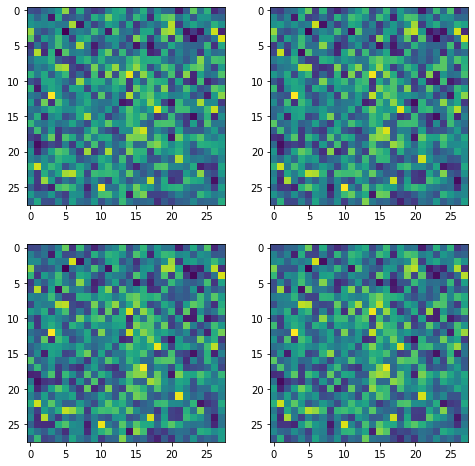

In [37]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = s[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [38]:
encoder = Model(x, z_mean)

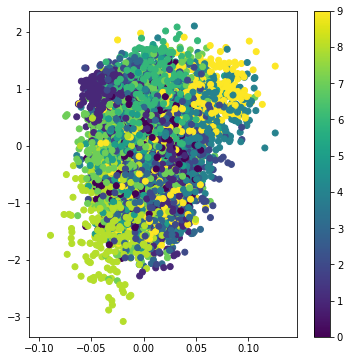

In [40]:
x_test_encoded = encoder.predict(X_test_flat, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

### VAE for an end-to-end fraud detection system

MNIST 문제를 fraud detection 문제로 바꾸기 위해서는 세개의 파라미터를 바꾸면 된다. input, intermediate, latent dimensionality이다. 

In [54]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('../input/creditcard.csv')
df.isnull().sum()
df = df.drop('Time',axis=1)
X = df.drop('Class',axis=1).values 
y = df['Class'].values
X.shape
X -= X.min(axis=0)
X /= X.max(axis=0)
X.mean()

0.5213456986251124

In [55]:
X.shape

(284807, 29)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [57]:
from keras.models import Model
from keras.layers import Input, Dense

data_in = Input(shape=(29,))
encoded = Dense(12,activation='tanh')(data_in)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(data_in,decoded)

In [58]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
autoencoder.fit(X_train,
                X_train,
                epochs = 20, 
                batch_size=128, 
                validation_data=(X_test,X_test))

Epoch 1/20
2003/2003 [==============================] - 3s 2ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 2/20
2003/2003 [==============================] - 3s 2ms/step - loss: 0.0011 - val_loss: 8.7557e-04
Epoch 3/20
2003/2003 [==============================] - 3s 2ms/step - loss: 6.9035e-04 - val_loss: 5.4244e-04
Epoch 4/20
2003/2003 [==============================] - 3s 2ms/step - loss: 4.1096e-04 - val_loss: 3.4648e-04
Epoch 5/20
2003/2003 [==============================] - 3s 1ms/step - loss: 3.2647e-04 - val_loss: 3.1174e-04
Epoch 6/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.9415e-04 - val_loss: 2.8450e-04
Epoch 7/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.7238e-04 - val_loss: 2.6326e-04
Epoch 8/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.4706e-04 - val_loss: 2.3644e-04
Epoch 9/20
2003/2003 [==============================] - 3s 2ms/step - loss: 2.2901e-04 - val_loss: 2.2585e-04
Epoch 10/20
2003/2003 

In [60]:
X_test.mean()

0.521391150408518

In [61]:
pred = autoencoder.predict(X_test[0:10])

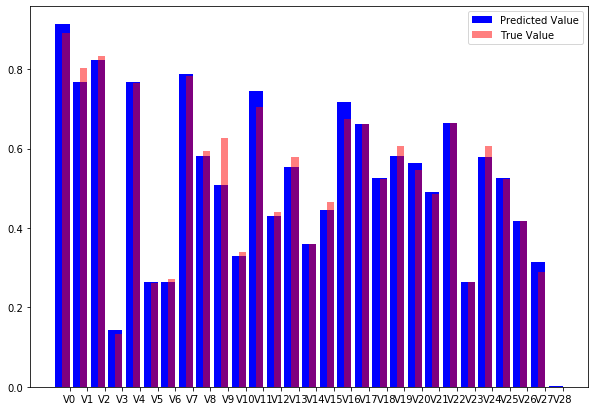

In [62]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8

prediction   = pred[9]
true_value    = X_test[9]

indices = np.arange(len(prediction))

fig = plt.figure(figsize=(10,7))

plt.bar(indices, prediction, width=width, 
        color='b', label='Predicted Value')

plt.bar([i+0.25*width for i in indices], true_value, 
        width=0.5*width, color='r', alpha=0.5, label='True Value')

plt.xticks(indices+width/2., 
           ['V{}'.format(i) for i in range(len(prediction))] )

plt.legend()

plt.show()

In [63]:
encoder = Model(data_in,encoded)
enc = encoder.predict(X_test)
np.savez('enc.npz',enc,y_test)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics

In [65]:
batch_size = 100
original_dim = 29
latent_dim = 6
intermediate_dim = 16
epochs = 50
epsilon_std = 1.0

In [66]:
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [67]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [68]:
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [69]:
decoder_h = Dense(intermediate_dim, activation='relu')
h_decoded = decoder_h(z)

decoder_mean = Dense(original_dim)
x_decoded_mean = decoder_mean(h_decoded)

In [70]:
vae = Model(x, x_decoded_mean)

In [71]:
xent_loss = original_dim * metrics.mean_squared_error(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

In [72]:
vae.add_loss(vae_loss)

In [73]:
from keras.optimizers import RMSprop
vae.compile(optimizer=RMSprop(lr=0.1))

In [74]:
vae.fit(X_train,
        shuffle=True,
        epochs=epochs,
        batch_size=256,
        validation_data=(X_test, None))

Epoch 1/50
1002/1002 [==============================] - 2s 2ms/step - loss: 10.6925 - val_loss: 0.1334
Epoch 2/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1335 - val_loss: 0.1298
Epoch 3/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1333 - val_loss: 0.1362
Epoch 4/50
1002/1002 [==============================] - 3s 3ms/step - loss: 0.1326 - val_loss: 0.1402
Epoch 5/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1311 - val_loss: 0.1222
Epoch 6/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1321 - val_loss: 0.1320
Epoch 7/50
1002/1002 [==============================] - 3s 3ms/step - loss: 0.1326 - val_loss: 0.1330
Epoch 8/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1326 - val_loss: 0.1509
Epoch 9/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.1327 - val_loss: 0.1381
Epoch 10/50
1002/1002 [==============================] - 2s 2ms/step - loss: 0.13

### GANs

GAN은 random latent vecotr에서 데이터를 생성하는 generator와 traning set에서 진짜를 generator에서 가짜를 분류하는 discriminator 두개로 구성된 neural network이다.

generative model은 이미지 데이터를 generate할 때 이해하기 쉽기 때문에, 이번에도 이미지 데이터를 통해서 GAN을 알아본다. 

GAN을 학습하는 방법은 아래의 순서대로 진행된다.

1. random number를 포함하는 latent vecotr가 생성된다.
2. latent vecotr는 이미지를 생성하는 generator에 전해진다.
3. traning set의 real image의 집합과 generator에 의해 생성된 fake 집합이 섞는다. discriminator는 real image와 fake image를 분류하도록 학습된다.
4. discriminator가 어느정도 훈련된 후에 다시 fake image를 주입한다. 이때 fake image의 라벨을 real로 한다. discriminaroe를 통해 backpropagate하고 discriminator의 입력에 대한 loss gradient를 얻는다. 이 information을 가지고 discriminator의 weight를 업데이트하지 않는다.
5. 이제 discriminator가 real image로 분류하도록 fake image를 변경해야하는 법을 알려주는 gradient가 있다. 이 gradient를 backpropagate에 사용하고 generator를 훈련한다.
6. generator의 성능을 향상시킨 후, 다시 fake image를 만들어 real iamge와 섞어 discriminator를 훈련한다. 이 gradient는 다시 generator를 훈련하는데 사용한다.

수학적으로 generator G와 discriminator D는 value function V(G, D)를 사용하여 mini-max 2인용 게임을 한다. 

$$min_{G} max_{D} V(G, D) = \mathbb{E}_{x~p_{data}(x)} [logD(x)] + \mathbb{E}_{z~p_{z}(z)} [log(1-D(G(z)))]$$

x는 real data의 distribution에서 추출한 항목 $p_{data}$ 이고 $z$는 latent vector space $p_z$에서 추출한 latent latent vector이다.

generator의 output distribution은 $p_q$로 표시된다. 이 게임의 global 최적값은 $p_g = p_{data}$임을 알 수 있는데, 즉, generated data의 distribution과 real data의 distribution이 같다는 말이다.

### A MNIST GAN

MNIST 문자열을 생성하기 위한 GAN을 실행해보자. 시작 전 몇개의 모듈을 import해야 한다. GANs은 large models이고 이번 섹션에서 모델을 쉽게 만들기 위해 sequential과 funtional API 모델을 조합하는 것을 볼 수 있다.

In [1]:
from keras.models import Model, Sequential

이번 예제에서는 새로운 타입의 레이어를 사용할 것인데 아래에서 임포트한다.

In [30]:
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import LeakyReLU, Reshape
from keras.layers import Conv2D, UpSampling2D, UpSampling3D

중요한 요소들을 살펴보겠다.

* LeakyReLU는 ReLU와 같은데, activation에서 아주 작은 negative value를 허용한다는 것이 특징이다. 이렇게 하면 gradient가 0이 되는 것을 방지한다. 이 activation은 GANs을 위해서 잘 작동한다. 

* Reshape은 np.reshape과 같다. tensor를 새로운 형태로 만든다.

* UpSampling2D는 feature map의 모든 숫자를 반복하여 2D feature map을 2배로 확장한다.

Adam optimizer를 사용한다.

In [4]:
from keras.optimizers import Adam

Nerual Network layers는 random하게 초기화된다. 보동 random number는 학습을 잘 도와주는 분포에서 추출된다. GANs을 위해서는, 정규 분포가 좋다고 밝혀졌다.

In [5]:
from keras.initializers import RandomNormal

이제 generator 모델을 만들어 보자.

In [42]:
latent_dim = 100

generator = Sequential() #1
generator.add(Dense(7*7*128, input_dim=latent_dim, kernel_initializer=RandomNormal(stddev=0.02))) #2
generator.add(LeakyReLU(0.2)) #3
generator.add(Reshape((7, 7, 256))) #4
generator.add(UpSampling3D(size=(1, 2, 2))) #5
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same')) #6
generator.add(LeakyReLU(0.2)) #7
generator.add(UpSampling3D(size=(1, 2, 2))) #8
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh')) #9
adam = Adam(lr=0.0002, beta_1=0.5)
generator.compile(loss='binary_crossentropy', optimizer=adam) #10

In [43]:
generator.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_17 (Reshape)         (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling3d_11 (UpSampling (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 14, 64)       22464     
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 128, 14, 64)       0         
_________________________________________________________________
up_sampling3d_12 (UpSampling (None, 128, 28, 128)    

10개의 key steop으로 된 generator 모델을 살펴보자.

1. generator 모델을 sequential 모델로 구축한다.
2. 첫번째 레이어는 random letent value와 128*7*7=6272 차원의 벡터를 매핑한다. 이미 생성된 데이터의 차원을 크게 확장한다. 이 fully connected layer의 경우 작은 표준 편자를 가진 정규 분포로부터 가중치를 초기화하는 것이 중요하다. uniform distribution과 다르게 Gaussian distribution 소량의 extreme value를 가지고 있는데, 학습을 쉽게 할 수 있도록 한다.
3. 첫번째 레이어를 위한 activation 함수로 LeakyReLU를 쓴다. negative input에 대한 기울기가 얼마나 가파른지를 정해야 하는데 negative input은 0.2가 곱해진다. 
4. 이제 flat한 vector를 3D tensor로 reshape한다. 컴퓨터 비전에서 Flatten레이어를 사용하는 것과 반대의 개념이다. 이제 7*7픽셀 이미지 또는 피쳐 맵에 128개의 채널이 있는 텐서가 있다. 
5. Upsampling2D를 사용해서, 이 이미지를 14*14 pixel로 확장한다. size argument는 폭 및 높이에 대한 승수 계수를 지정한다.
6. 이제 standart Conv2D 레리어를 적용할 수 있다. image 분류기의 경우와는 다르게, 5*5 픽셀의 비교적 큰 커널 크기를 사용한다.
7. Conv2D 레이어 뒤에 오는 LeakReLU는 또 다른 activation 함수이다.
8. MNIST 이미지 사이즈와 같은 28*28의 이미지를 만들기 위해 upsampling을 한 번더 한다.
9. MNIST 이미지가 black and white로 이루어져 있기 때문에, generator의 마지막 convolutional layer의 오직 single channel image를 출력한다. 마지막 레이어의 activation은 tanh이다. Tanh는 -1과 1로 모든 밸류를 쥐어짜버린다. 일반적으로 이미지 데이터는 0 미안의 값이 없으므로 이는 이해하기 어려울 수 있다. 그러나 경험적으로 tanh가 sigmoid보다 GAN에서 훨씬 잘 작동한다는 것이 밝혀졌다. 
10. 마지막으로 평소보다 아주 작은 learning rate를 가지고 Adam optimizer와 함께 train을 위해 generator를 complie한다. 

discriminator는 standard image classifier 인데 진짜와 가짜를 구별한다. GAN 관련 수정 사항은 몇 가지뿐이다.

In [44]:
# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), 
                         strides=(2, 2), 
                         padding='same', 
                         input_shape=(1, 28, 28),
                         kernel_initializer=RandomNormal(stddev=0.02))) #1

discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), 
                         strides=(2, 2), 
                         padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3)) #2
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [45]:
discriminator.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 1, 14, 64)         44864     
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 1, 14, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 14, 64)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 1, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 896)             

두 가지 키 element가 있다. 

1. generator와 마찬가지로 discriminator의 첫번째 레이어는 가우시안 분포로부터 램던하게 초기화되어야 한다.
2. Dropout은 image 분류에서 흔히 사용된다. GAN에서는 마지막 레이어 전에 사용된다.

이제 제너레이터와 디스크리미네이터를 가지고 있다. 제너레이터 학습을 위해 디스크리미네이터로 부터 backpropagate된 gradient를 가져와서 제너레이터를 학습시킨다. 이 부분이 케라스의 모듈형 디자인의 진가를 볼 수 있는 부분이다.

* 책의 예제대로 했으나 결과가 다르게 나와 tensorflow 공식 예제를 통해 generator와 discriminator를 다시 구현한다.

In [47]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Reshape((7, 7, 256)))
assert model.output_shape == (None, 7, 7, 256) # 주목: 배치사이즈로 None이 주어집니다.

model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
assert model.output_shape == (None, 7, 7, 128)
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
assert model.output_shape == (None, 14, 14, 64)
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
assert model.output_shape == (None, 28, 28, 1)

NameError: name 'layers' is not defined